In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,358 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import folium

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 파일 불러오기

In [44]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["figure.figsize"] = (10,10)

ppl_2021 = pd.read_csv('/content/drive/MyDrive/빅캠공모전_data/ppl_2021.csv',encoding='cp949')

In [45]:
ppl_2021

,Unnamed: 0,atdrc_code_se,stdr_ym,tot_popltn_co,Unnamed: 4,Unnamed: 5
0,901,종로구,202103,147296,NaN,2021-03
1,902,중구,202103,124552,NaN,2021-03
2,903,용산구,202103,229013,NaN,2021-03
3,904,성동구,202103,291906,NaN,2021-03
4,905,광진구,202103,343392,NaN,2021-03
...,...,...,...,...,...,...
170,2196,관악구,202107,488525,NaN,2021-07
171,2197,서초구,202107,418294,NaN,2021-07
172,2198,강남구,202107,530529,NaN,2021-07
173,2199,송파구,202107,658093,NaN,2021-07


# 데이터 처리

In [46]:
ppl_2021 = ppl_2021.drop(columns = ['Unnamed: 4','stdr_ym'],axis=1)
ppl_2021

,Unnamed: 0,atdrc_code_se,tot_popltn_co,Unnamed: 5
0,901,종로구,147296,2021-03
1,902,중구,124552,2021-03
2,903,용산구,229013,2021-03
3,904,성동구,291906,2021-03
4,905,광진구,343392,2021-03
...,...,...,...,...
170,2196,관악구,488525,2021-07
171,2197,서초구,418294,2021-07
172,2198,강남구,530529,2021-07
173,2199,송파구,658093,2021-07


In [47]:
ppl_2021 = ppl_2021.drop(columns = 'Unnamed: 0',axis=1)

In [ ]:
ppl_2021

In [50]:
ppl_2021_date = ppl_2021['Unnamed: 5']
ppl_2021['월'] = ppl_2021_date
ppl_2021

,atdrc_code_se,tot_popltn_co,Unnamed: 5,월
0,종로구,147296,2021-03,2021-03
1,중구,124552,2021-03,2021-03
2,용산구,229013,2021-03,2021-03
3,성동구,291906,2021-03,2021-03
4,광진구,343392,2021-03,2021-03
...,...,...,...,...
170,관악구,488525,2021-07,2021-07
171,서초구,418294,2021-07,2021-07
172,강남구,530529,2021-07,2021-07
173,송파구,658093,2021-07,2021-07


In [52]:
ppl_2021 = ppl_2021.drop(columns = 'Unnamed: 5',axis=1)
ppl_2021

,atdrc_code_se,tot_popltn_co,월
0,종로구,147296,2021-03
1,중구,124552,2021-03
2,용산구,229013,2021-03
3,성동구,291906,2021-03
4,광진구,343392,2021-03
...,...,...,...
170,관악구,488525,2021-07
171,서초구,418294,2021-07
172,강남구,530529,2021-07
173,송파구,658093,2021-07


In [ ]:
ppl_2021_nd = ppl_2021['월']
ppl_2021_nd = ppl_2021_nd.tolist()
ppl_2021_nd

for i in range(len(ppl_2021_nd)):
  ppl_2021_nd[i] = str(ppl_2021_nd[i])
  ppl_2021_nd[i] = ppl_2021_nd[i].split()
  ppl_2021_nd[i].insert(4,'-15')
  
  ppl_2021_nd[i] = ''.join(ppl_2021_nd[i])

  
ppl_2021_nd

In [55]:
ppl_2021['월'] = ppl_2021_nd
ppl_2021

,atdrc_code_se,tot_popltn_co,월
0,종로구,147296,2021-03-15
1,중구,124552,2021-03-15
2,용산구,229013,2021-03-15
3,성동구,291906,2021-03-15
4,광진구,343392,2021-03-15
...,...,...,...
170,관악구,488525,2021-07-15
171,서초구,418294,2021-07-15
172,강남구,530529,2021-07-15
173,송파구,658093,2021-07-15


In [57]:
ppl_2021.to_csv('/content/drive/MyDrive/빅캠공모전_data/ppl_2021_new.csv',encoding='cp949')

# 구역 1

In [61]:
from pystan import StanModel
from fbprophet import Prophet

## 서초구

In [60]:
seocho = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('서초구')]
seocho = seocho.sort_values('월')
seocho = seocho.reset_index(drop=True)
seocho = seocho.drop(columns = 'atdrc_code_se',axis=1)
seocho = seocho.rename(columns={'tot_popltn_co': 'y','월':'ds'})
seocho = seocho[['ds','y']]
seocho

,ds,y
0,2021-01-15,424707
1,2021-02-15,423829
2,2021-03-15,421315
3,2021-04-15,420318
4,2021-05-15,419121
5,2021-06-15,418407
6,2021-07-15,418294


In [62]:
m = Prophet()
m.fit(seocho)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


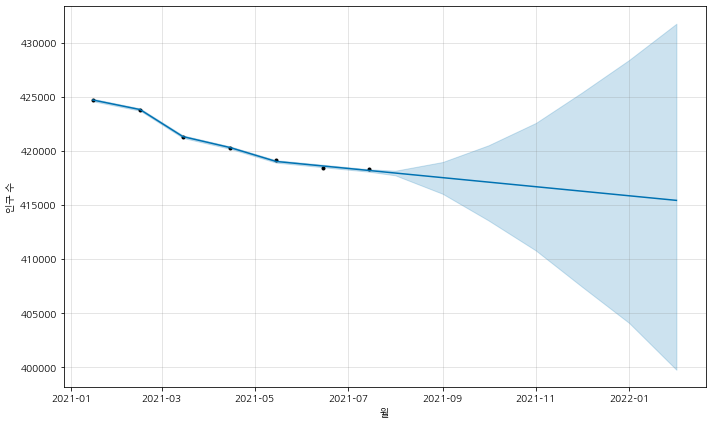

In [64]:
future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 강남구

In [65]:
gangnam = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('강남구')]
gangnam = gangnam.sort_values('월')
gangnam = gangnam.reset_index(drop=True)
gangnam = gangnam.drop(columns = 'atdrc_code_se',axis=1)
gangnam = gangnam.rename(columns={'tot_popltn_co': 'y','월':'ds'})
gangnam = gangnam[['ds','y']]
gangnam

,ds,y
0,2021-01-15,538536
1,2021-02-15,537879
2,2021-03-15,534796
3,2021-04-15,533579
4,2021-05-15,532296
5,2021-06-15,531375
6,2021-07-15,530529


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


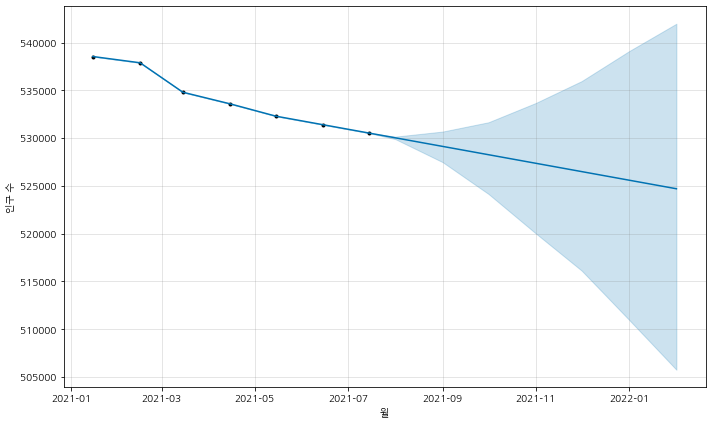

In [67]:
m = Prophet()
m.fit(gangnam)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 송파구

In [68]:
songpa = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('송파구')]
songpa = songpa.sort_values('월')
songpa = songpa.reset_index(drop=True)
songpa = songpa.drop(columns = 'atdrc_code_se',axis=1)
songpa = songpa.rename(columns={'tot_popltn_co': 'y','월':'ds'})
songpa = songpa[['ds','y']]
songpa

,ds,y
0,2021-01-15,667222
1,2021-02-15,665463
2,2021-03-15,661411
3,2021-04-15,660160
4,2021-05-15,659446
5,2021-06-15,658670
6,2021-07-15,658093


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


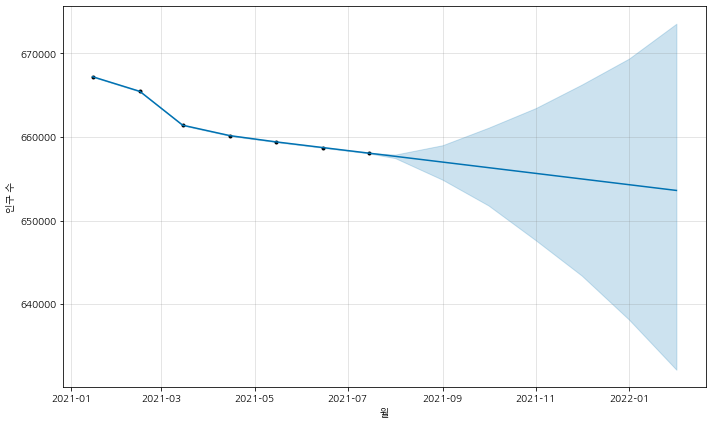

In [69]:
m = Prophet()
m.fit(songpa)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')


## 강동구

In [70]:
gangdong = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('강동구')]
gangdong = gangdong.sort_values('월')
gangdong = gangdong.reset_index(drop=True)
gangdong = gangdong.drop(columns = 'atdrc_code_se',axis=1)
gangdong = gangdong.rename(columns={'tot_popltn_co': 'y','월':'ds'})
gangdong = gangdong[['ds','y']]
gangdong

,ds,y
0,2021-01-15,461334
1,2021-02-15,464208
2,2021-03-15,464900
3,2021-04-15,465331
4,2021-05-15,465459
5,2021-06-15,465209
6,2021-07-15,465191


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


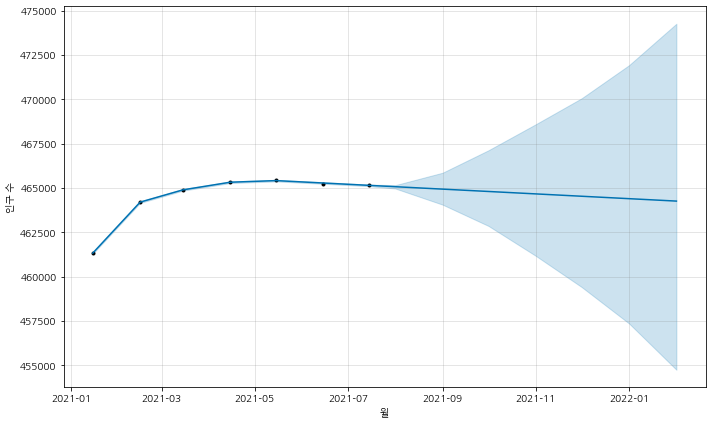

In [71]:
m = Prophet()
m.fit(gangdong)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 동작구

In [72]:
dongjak = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('동작구')]
dongjak = dongjak.sort_values('월')
dongjak = dongjak.reset_index(drop=True)
dongjak = dongjak.drop(columns = 'atdrc_code_se',axis=1)
dongjak = dongjak.rename(columns={'tot_popltn_co': 'y','월':'ds'})
dongjak = dongjak[['ds','y']]
dongjak

,ds,y
0,2021-01-15,390433
1,2021-02-15,389754
2,2021-03-15,388730
3,2021-04-15,388672
4,2021-05-15,388396
5,2021-06-15,387847
6,2021-07-15,387810


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


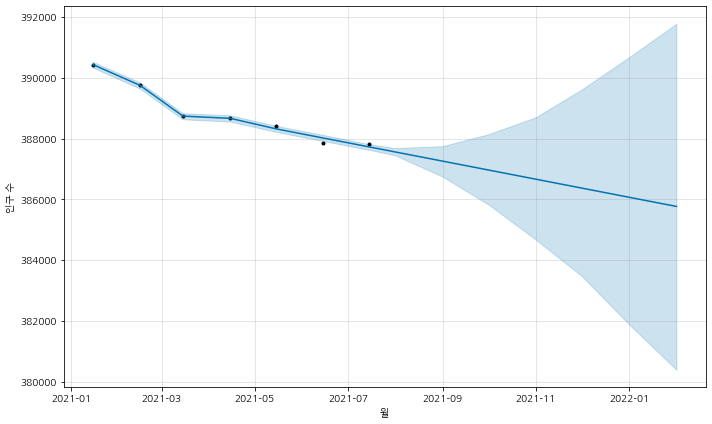

In [73]:
m = Prophet()
m.fit(dongjak)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

# 구역 2

## 강서구

In [74]:
gangseo = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('강서구')]
gangseo = gangseo.sort_values('월')
gangseo = gangseo.reset_index(drop=True)
gangseo = gangseo.drop(columns = 'atdrc_code_se',axis=1)
gangseo = gangseo.rename(columns={'tot_popltn_co': 'y','월':'ds'})
gangseo = gangseo[['ds','y']]
gangseo

,ds,y
0,2021-01-15,579176
1,2021-02-15,579082
2,2021-03-15,577320
3,2021-04-15,577580
4,2021-05-15,577484
5,2021-06-15,577519
6,2021-07-15,577058


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


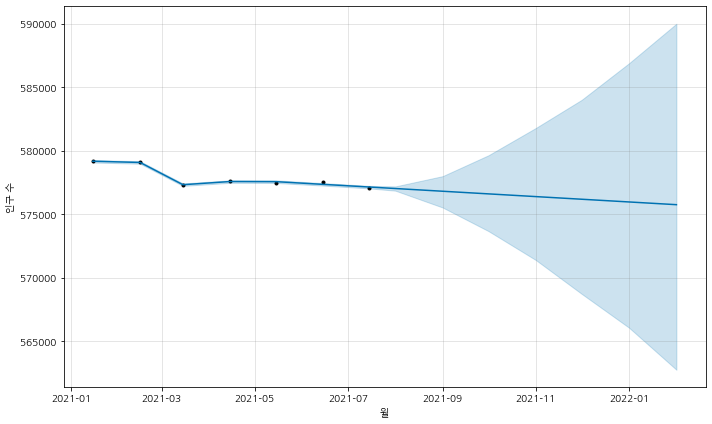

In [75]:
m = Prophet()
m.fit(gangseo)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')


## 양천구

In [76]:
yangcheon = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('양천구')]
yangcheon = yangcheon.sort_values('월')
yangcheon = yangcheon.reset_index(drop=True)
yangcheon = yangcheon.drop(columns = 'atdrc_code_se',axis=1)
yangcheon = yangcheon.rename(columns={'tot_popltn_co': 'y','월':'ds'})
yangcheon = yangcheon[['ds','y']]
yangcheon

,ds,y
0,2021-01-15,453382
1,2021-02-15,454270
2,2021-03-15,452677
3,2021-04-15,452112
4,2021-05-15,451541
5,2021-06-15,450992
6,2021-07-15,450431


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


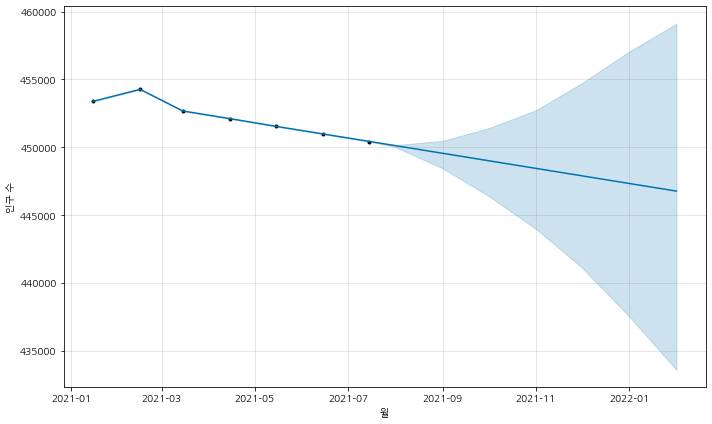

In [77]:
m = Prophet()
m.fit(yangcheon)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 구로구

In [80]:
guro = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('구로구')]
guro = guro.sort_values('월')
guro = guro.reset_index(drop=True)
guro = guro.drop(columns = 'atdrc_code_se',axis=1)
guro = guro.rename(columns={'tot_popltn_co': 'y','월':'ds'})
guro = guro[['ds','y']]
guro

,ds,y
0,2021-01-15,403518
1,2021-02-15,402642
2,2021-03-15,401074
3,2021-04-15,400399
4,2021-05-15,399950
5,2021-06-15,399266
6,2021-07-15,398744


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


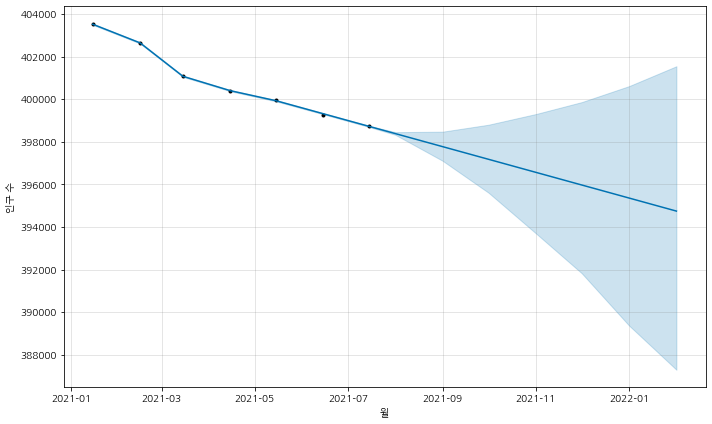

In [81]:
m = Prophet()
m.fit(guro)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 금천구

In [82]:
gc = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('금천구')]
gc = gc.sort_values('월')
gc = gc.reset_index(drop=True)
gc = gc.drop(columns = 'atdrc_code_se',axis=1)
gc = gc.rename(columns={'tot_popltn_co': 'y','월':'ds'})
gc = gc[['ds','y']]
gc

,ds,y
0,2021-01-15,231634
1,2021-02-15,231290
2,2021-03-15,229844
3,2021-04-15,229639
4,2021-05-15,229823
5,2021-06-15,230168
6,2021-07-15,230665


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


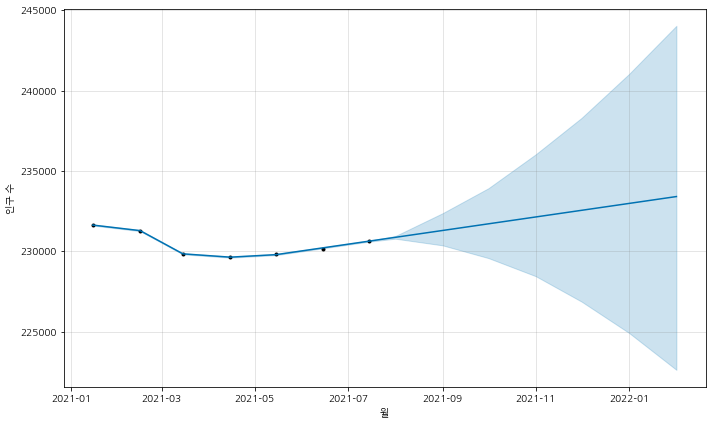

In [83]:
m = Prophet()
m.fit(gc)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 영등포구

In [85]:
ydp = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('영등포구')]
ydp = ydp.sort_values('월')
ydp = ydp.reset_index(drop=True)
ydp = ydp.drop(columns = 'atdrc_code_se',axis=1)
ydp = ydp.rename(columns={'tot_popltn_co': 'y','월':'ds'})
ydp = ydp[['ds','y']]
ydp

,ds,y
0,2021-01-15,380169
1,2021-02-15,380443
2,2021-03-15,377590
3,2021-04-15,377696
4,2021-05-15,377577
5,2021-06-15,377421
6,2021-07-15,377408


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


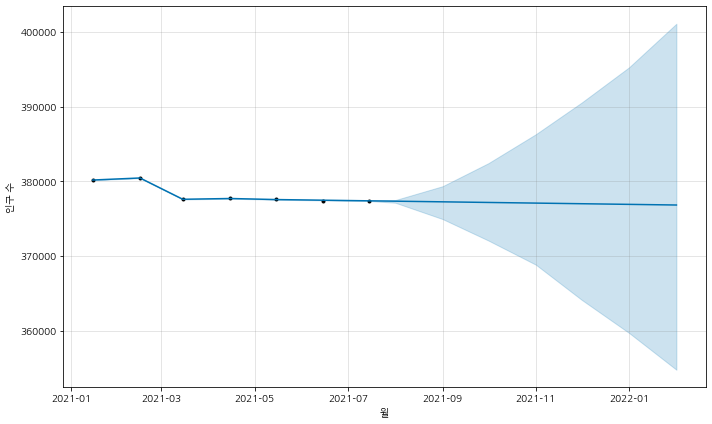

In [86]:
m = Prophet()
m.fit(ydp)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 관악구

In [88]:
gw = ppl_2021[ppl_2021['atdrc_code_se'].str.contains('관악구')]
gw = gw.sort_values('월')
gw = gw.reset_index(drop=True)
gw = gw.drop(columns = 'atdrc_code_se',axis=1)
gw = gw.rename(columns={'tot_popltn_co': 'y','월':'ds'})
gw = gw[['ds','y']]
gw

,ds,y
0,2021-01-15,494175
1,2021-02-15,493374
2,2021-03-15,490352
3,2021-04-15,489464
4,2021-05-15,489160
5,2021-06-15,488800
6,2021-07-15,488525


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


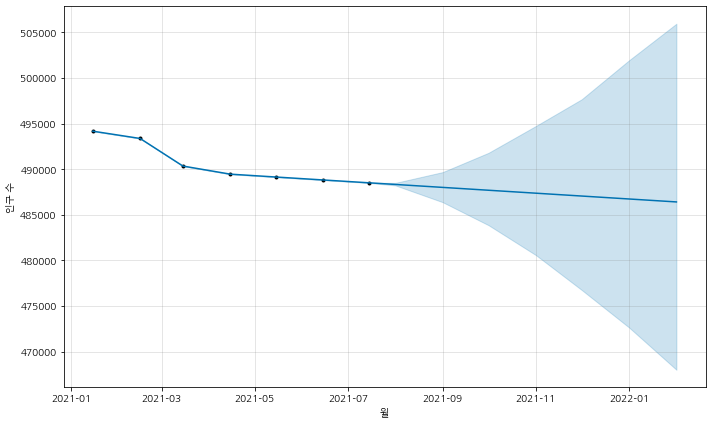

In [89]:
m = Prophet()
m.fit(gw)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')